<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Импортируем-библиотеки-и-функции,-используемые-в-проекте" data-toc-modified-id="Импортируем-библиотеки-и-функции,-используемые-в-проекте-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Импортируем библиотеки и функции, используемые в проекте</a></span></li><li><span><a href="#Загрузка-и-предварительный-анализ-данных" data-toc-modified-id="Загрузка-и-предварительный-анализ-данных-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Загрузка и предварительный анализ данных</a></span></li><li><span><a href="#Приведение-наименований-столбцов-к-змеиному-регистру" data-toc-modified-id="Приведение-наименований-столбцов-к-змеиному-регистру-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Приведение наименований столбцов к змеиному регистру</a></span></li><li><span><a href="#Анализ-и-обработка-некорректных-значений" data-toc-modified-id="Анализ-и-обработка-некорректных-значений-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Анализ и обработка некорректных значений</a></span></li><li><span><a href="#Обработка-пропусков-в-данных" data-toc-modified-id="Обработка-пропусков-в-данных-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Обработка пропусков в данных</a></span></li><li><span><a href="#Анализ-данных-на-мультиколлинеарность-факторов" data-toc-modified-id="Анализ-данных-на-мультиколлинеарность-факторов-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Анализ данных на мультиколлинеарность факторов</a></span></li><li><span><a href="#Подготовка-выборок-(кодирование-категориальных-признаков,-разделение-данных-на-выборки)" data-toc-modified-id="Подготовка-выборок-(кодирование-категориальных-признаков,-разделение-данных-на-выборки)-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>Подготовка выборок (кодирование категориальных признаков, разделение данных на выборки)</a></span></li></ul></li><li><span><a href="#Обучение-моделей" data-toc-modified-id="Обучение-моделей-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Обучение моделей</a></span></li><li><span><a href="#Анализ-моделей" data-toc-modified-id="Анализ-моделей-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Анализ моделей</a></span><ul class="toc-item"><li><span><a href="#Модель-«дерево-решений»" data-toc-modified-id="Модель-«дерево-решений»-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Модель «дерево решений»</a></span></li><li><span><a href="#Модель-«градиентный-бустинг»-библиотеки-LightGBM" data-toc-modified-id="Модель-«градиентный-бустинг»-библиотеки-LightGBM-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Модель «градиентный бустинг» библиотеки LightGBM</a></span></li><li><span><a href="#Модель-«градиентный-бустинг»-библиотеки-CatBoost" data-toc-modified-id="Модель-«градиентный-бустинг»-библиотеки-CatBoost-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Модель «градиентный бустинг» библиотеки CatBoost</a></span></li><li><span><a href="#Константная-модель-по-медиане" data-toc-modified-id="Константная-модель-по-медиане-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Константная модель по медиане</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

# Определение стоимости автомобиля - CarPrice

Автосалон по продаже подержанных автомобилей «CarPrice» разрабатывает сервис для быстрой автоматической оценки стоимости автомобиля. С помощью данного сервиса клиенты автосалона смогут оперативно рассчитать рыночную стоимость своего автомобиля.<br>
Для разработки сервиса будем использовать исторические данные по продажам автомобилей: производители, модели, комплектации, характеристики и цены автомобилей.

Необходимо построить ML-модель для определения стоимости автомобиля.

Требования к ML-модели:
1. Качество прогнозирования оценивать по метрике RMSE, значение метрики не должно превышать 1800.
2. Время обучения не должно превышать 1 минуту.
3. Время прогнозирования не должно превышать 300 мс.

## Подготовка данных

### Импортируем библиотеки и функции, используемые в проекте

In [1]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
import math as mt
import warnings
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.dummy import DummyRegressor

### Загрузка и предварительный анализ данных

Прочитаем файл 'autos.csv' и сохраним его в переменной df:

In [2]:
df = pd.read_csv('autos.csv')

Выведем на экран общую информацию и первые 5 строк таблицы df:

In [3]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        354369 non-null  object
 1   Price              354369 non-null  int64 
 2   VehicleType        316879 non-null  object
 3   RegistrationYear   354369 non-null  int64 
 4   Gearbox            334536 non-null  object
 5   Power              354369 non-null  int64 
 6   Model              334664 non-null  object
 7   Kilometer          354369 non-null  int64 
 8   RegistrationMonth  354369 non-null  int64 
 9   FuelType           321474 non-null  object
 10  Brand              354369 non-null  object
 11  NotRepaired        283215 non-null  object
 12  DateCreated        354369 non-null  object
 13  NumberOfPictures   354369 non-null  int64 
 14  PostalCode         354369 non-null  int64 
 15  LastSeen           354369 non-null  object
dtypes: int64(7), object(

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,NotRepaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,2016-03-24 11:52:17,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


### Приведение наименований столбцов к змеиному регистру

В связи с тем, что наименования столбцов датафрейма df не соответствуют змеиному регистру (стандарт PEP), требуется их переименование для приведения к змеиному регистру.

Создадим функцию для изменения имени столбца в соответствии со змеиным регистром, затем осуществим приведение столбцов датафрейма df к змеиному регистру и проверим результат с помощью вывода на экран перечня столбцов: 

In [4]:
def column_name_to_snake(column_name: str):
    str_tmp = re.sub('(.)([A-Z][a-z]+)', r'\1_\2', column_name)
    return re.sub('([a-z0-9])([A-Z])', r'\1_\2', str_tmp).lower()

In [5]:
for col_name in df.columns:
    df = df.rename(columns={col_name: column_name_to_snake(col_name)})

In [6]:
df.columns

Index(['date_crawled', 'price', 'vehicle_type', 'registration_year', 'gearbox',
       'power', 'model', 'kilometer', 'registration_month', 'fuel_type',
       'brand', 'not_repaired', 'date_created', 'number_of_pictures',
       'postal_code', 'last_seen'],
      dtype='object')

### Анализ и обработка некорректных значений

Выведем на экран описание данных о числовых столбцах датафрейма df:

In [7]:
df.describe()

,price,registration_year,power,kilometer,registration_month,number_of_pictures,postal_code
count,354369.000000,354369.000000,354369.000000,354369.000000,354369.000000,354369.0,354369.000000
mean,4416.656776,2004.234448,110.094337,128211.172535,5.714645,0.0,50508.689087
std,4514.158514,90.227958,189.850405,37905.341530,3.726421,0.0,25783.096248
min,0.000000,1000.000000,0.000000,5000.000000,0.000000,0.0,1067.000000
25%,1050.000000,1999.000000,69.000000,125000.000000,3.000000,0.0,30165.000000
50%,2700.000000,2003.000000,105.000000,150000.000000,6.000000,0.0,49413.000000
75%,6400.000000,2008.000000,143.000000,150000.000000,9.000000,0.0,71083.000000
max,20000.000000,9999.000000,20000.000000,150000.000000,12.000000,0.0,99998.000000


По результатам анализа данных можно сделать следующие выводы:
1. Цена автомобиля не может быть 0 евро, а более детальный анализ показывает, что адекватные цены на автомобили начинаются с 200 евро. Поэтому, исключим из датафрейма строки с ценой автомобиля до 200 евро включительно.
2. Диапазон года регистрации автомобиля от 1000 до 9999 лет, что явно не является достоверной информацией. Более детальный анализ показывает, что адекватная информация на автомобили начинается с 1970 года и заканчивается до 2020 года. Поэтому, исключим из датафрейма строки с годом регистрации автомобиля до 1970 года и свыше 2019 года.
3. Мощность автомобиля не может быть 0 л.с., а более детальный анализ показывает, что адекватное значение мощности начинается с 50 л.с. и заканчивается до 550 л.с.. Поэтому, для автомобилей с мощностью двигателя до 50 и свыше 550 л.с. заполним столбец мощность средним значением мощности для аналогичных автомобилей одного бренда, одной марки и одного года регистрации. При этом, строки с незаполненными значениями мощности удалим при обработке пропусков данных.
4. Месяц регистрации автомобиля не может быть 0. Поэтому, чтобы не повлиять на распределение данных, заменим нулевые значения случайными значениями в диапазоне от 1 до 12.
5. Столбец с информацией о количестве фотографий содержит только нулевые значения, поэтому, исключим его при подготовке признаков.
6. Анализ перечней типов кузова и моделей автомобилей показал, что данные столбцы не могут иметь значения 'other' (это некорректное заполнение данных), тип кузова и модель автомобиля всегда имеет определенное значение. Поэтому, изменим значения с 'other' на np.nan и удалим строки при обработке пропусков данных, так как заполнить указанные значения на основе имеющихся данных невозможно.

Также, дополнительный анализ оставшихся (нечисловых) столбцов датафрейма показал, что информация с датами скачивания анкеты из базы, создания анкеты и последней активности пользователя не влияет на стоимость автомобиля. Поэтому, исключим данные столбцы при подготовке признаков.

Таким образом, столбцами-признаками являются: 'vehicle_type', 'registration_year', 'registration_month', 'gearbox', 'power', 'model', 'kilometer', 'fuel_type', 'brand', 'not_repaired', 'postal_code', целевым столбцом является 'price'.

Произведем обработку данных датафрейма по результатам проведенного анализа и проверим корректность изменений:

In [8]:
df = df.drop(['date_crawled', 'date_created', 'number_of_pictures', 'last_seen'], axis=1)

In [9]:
#Исключение из датафрейма некорректных строк по цене и году регистрации автомобиля
df = df.query('price > 200 and registration_year >= 1970 and registration_year <= 2019').reset_index(drop = True)
#Заполнение месяца регистрации автомобиля
df.loc[df['registration_month'] == 0, 'registration_month'] = pd.Series(
    np.random.randint(1, 13, size=df['registration_month'].count()))
#Заполнение мощности автомобиля
df.loc[(df['power'] < 50) | (df['power'] > 550), 'power'] = df.query('power >=50 and power <=550').groupby(
    ['brand', 'model', 'registration_year'])['power'].transform('mean')
#Замена значений 'other' на np.nan в столбцах 'vehicle_type' и 'model'
df['vehicle_type'] = df['vehicle_type'].replace('other', np.nan)
df['model'] = df['model'].replace('other', np.nan)

In [10]:
df.describe()

,price,registration_year,power,kilometer,registration_month,postal_code
count,333769.000000,333769.000000,295940.000000,333769.000000,333769.000000,333769.000000
mean,4658.131930,2003.425153,122.244049,128632.602189,6.407408,50772.407653
std,4506.084702,6.846239,52.860347,36949.072240,3.358054,25699.435778
min,202.000000,1970.000000,50.000000,5000.000000,1.000000,1067.000000
25%,1299.000000,1999.000000,80.000000,125000.000000,4.000000,30519.000000
50%,2990.000000,2003.000000,115.000000,150000.000000,6.000000,49593.000000
75%,6666.000000,2008.000000,150.000000,150000.000000,9.000000,71263.000000
max,20000.000000,2019.000000,550.000000,150000.000000,12.000000,99998.000000


### Обработка пропусков в данных

На основе анализа данных можно сделать вывод, что столбец 'not_repaired' содержит признак был ли автомобиль в аварии и ремонтировался ли после нее (значение 'no') или автомобиль не был в аварии (значение 'yes').

Так как, указанный столбец содержит пропуски в большом количестве данных (более 60 тыс. строк), то необходимо заполнить данный столбец данными. С высокой вероятностью можно предположить, что отсутствие информации об авариях говорит о том, что автомобиль не был в авариях, поэтому столбец 'not_repaired' заполним значением 'yes':

In [11]:
df['not_repaired'] = df['not_repaired'].replace(np.nan, 'yes')

Столбцы 'vehicle_type', 'gearbox', 'model', 'fuel_type', 'power' содержат пропуски в данных. Так как, заполнить указанные столбцы на основе имеющихся данных невозможно, то удалим строки из датафрейма с пропусками в данных и проверим корректность удаления:

In [12]:
df = df.dropna(subset = ['vehicle_type', 'gearbox', 'model', 'fuel_type', 'power']).reset_index(drop = True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236542 entries, 0 to 236541
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   price               236542 non-null  int64  
 1   vehicle_type        236542 non-null  object 
 2   registration_year   236542 non-null  int64  
 3   gearbox             236542 non-null  object 
 4   power               236542 non-null  float64
 5   model               236542 non-null  object 
 6   kilometer           236542 non-null  int64  
 7   registration_month  236542 non-null  int64  
 8   fuel_type           236542 non-null  object 
 9   brand               236542 non-null  object 
 10  not_repaired        236542 non-null  object 
 11  postal_code         236542 non-null  int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 21.7+ MB


### Анализ данных на мультиколлинеарность факторов

Проверим в каких числовых столбцах данные имеют сильную взаимосвязь. Для этого, построим матрицу корреляции:

In [14]:
corr_matrix = df.drop(['price'], axis=1).corr()
corr_matrix.style.background_gradient(cmap='coolwarm')

,registration_year,power,kilometer,registration_month,postal_code
registration_year,1.000000,0.145709,-0.442510,-0.012304,0.031389
power,0.145709,1.000000,0.114053,0.021832,0.047351
kilometer,-0.442510,0.114053,1.000000,0.003214,-0.010698
registration_month,-0.012304,0.021832,0.003214,1.000000,-0.009910
postal_code,0.031389,0.047351,-0.010698,-0.009910,1.000000


### Подготовка выборок (кодирование категориальных признаков, разделение данных на выборки)

Для ML-моделей, которые поддерживают работу с категориальными признаками напрямую, изменим тип данных столбцов с категориальными признаками с object на category:

In [15]:
cat_columns = ['vehicle_type', 'gearbox', 'model', 'fuel_type', 'brand', 'not_repaired']
for colname in cat_columns:
    df[colname] = df[colname].astype('category')

In [16]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236542 entries, 0 to 236541
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype   
---  ------              --------------   -----   
 0   price               236542 non-null  int64   
 1   vehicle_type        236542 non-null  category
 2   registration_year   236542 non-null  int64   
 3   gearbox             236542 non-null  category
 4   power               236542 non-null  float64 
 5   model               236542 non-null  category
 6   kilometer           236542 non-null  int64   
 7   registration_month  236542 non-null  int64   
 8   fuel_type           236542 non-null  category
 9   brand               236542 non-null  category
 10  not_repaired        236542 non-null  category
 11  postal_code         236542 non-null  int64   
dtypes: category(6), float64(1), int64(5)
memory usage: 12.4 MB


,price,vehicle_type,registration_year,gearbox,power,model,kilometer,registration_month,fuel_type,brand,not_repaired,postal_code
0,9800,suv,2004,auto,163.0,grand,125000,8,gasoline,jeep,yes,90480
1,1500,small,2001,manual,75.0,golf,150000,6,petrol,volkswagen,no,91074
2,3600,small,2008,manual,69.0,fabia,90000,7,gasoline,skoda,no,60437
3,650,sedan,1995,manual,102.0,3er,150000,10,petrol,bmw,yes,33775
4,2200,convertible,2004,manual,109.0,2_reihe,150000,8,petrol,peugeot,no,67112


Для ML-моделей, которые не поддерживают работу с категориальными признаками напрямую, произведем преобразование столбцов с категориальными признаками методом прямого кодирования (OHE):

In [17]:
df_ohe = pd.get_dummies(df, columns=cat_columns, drop_first=True)

In [18]:
pd.set_option('display.max_info_columns', 310)
df_ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236542 entries, 0 to 236541
Data columns (total 304 columns):
 #    Column                    Non-Null Count   Dtype  
---   ------                    --------------   -----  
 0    price                     236542 non-null  int64  
 1    registration_year         236542 non-null  int64  
 2    power                     236542 non-null  float64
 3    kilometer                 236542 non-null  int64  
 4    registration_month        236542 non-null  int64  
 5    postal_code               236542 non-null  int64  
 6    vehicle_type_convertible  236542 non-null  uint8  
 7    vehicle_type_coupe        236542 non-null  uint8  
 8    vehicle_type_sedan        236542 non-null  uint8  
 9    vehicle_type_small        236542 non-null  uint8  
 10   vehicle_type_suv          236542 non-null  uint8  
 11   vehicle_type_wagon        236542 non-null  uint8  
 12   gearbox_manual            236542 non-null  uint8  
 13   model_145                 2

Создадим функцию для разделения данных на обучающую (75%) и валидационную (25%) выборки:

In [19]:
def f_data_split_train_valid(f_df: pd.DataFrame, f_target_colname: str):
    #функция для разделения исходных данных на обучающую (75%) и валидационную (25%) выборки
    
    #Разобъем исходную таблицу на две: целевой признак и остальные признаки
    f_df_features = f_df.drop([f_target_colname], axis=1)
    f_df_target = f_df[f_target_colname]
    #Выделим обучающую (75%) и валидационную (25%) выборки из общего набора данных
    f_features_train, f_features_valid, f_target_train, f_target_valid = train_test_split(
        f_df_features, f_df_target, test_size=0.25, random_state=12345)
    f_features_train = f_features_train.reset_index(drop=True)
    f_features_valid = f_features_valid.reset_index(drop=True)
    f_target_train = f_target_train.reset_index(drop=True)
    f_target_valid = f_target_valid.reset_index(drop=True)
    
    return f_features_train, f_features_valid, f_target_train, f_target_valid

Создадим обучающую и валидационную выборки для ML-моделей, которые умеют работать с категориальными признаками напрямую:

In [20]:
cat_features_train, cat_features_valid, cat_target_train, cat_target_valid = f_data_split_train_valid(df, 'price')
print(cat_features_train.shape)
print(cat_features_valid.shape)
print(cat_target_train.shape)
print(cat_target_valid.shape)

(177406, 11)
(59136, 11)
(177406,)
(59136,)


Создадим обучающую и валидационную выборки для ML-моделей, которые не умеют работать с категориальными признаками напрямую (после преобразования данных методом OHE):

In [21]:
ohe_features_train, ohe_features_valid, ohe_target_train, ohe_target_valid = f_data_split_train_valid(df_ohe, 'price')
print(ohe_features_train.shape)
print(ohe_features_valid.shape)
print(ohe_target_train.shape)
print(ohe_target_valid.shape)

(177406, 303)
(59136, 303)
(177406,)
(59136,)


**Вывод:**

Для проведения исследования представлен 1 csv-файл 'autos.csv', который содержит таблицу с данными.
В каждой строке таблицы - данные о технических характеристиках, комплектации и цене одного автомобиля.

***По результатам анализа и обработки данных можно сделать следующие выводы:***
1. Наименования столбцов не соответствовали змеиному регистру (стандарт PEP), поэтому привели наименования столбцов к змеиному регистру.
2. Часть столбцов таблицы содержали некорректные данные (например, мощность автомобиля не может быть 0 л.с.), поэтому произвели обработку данных, по результатам которой можно сказать, что данные либо заполнены корректными значениями, либо очищены для удаления из таблицы.
3. Часть столбцов таблицы содержали пропуски в данных, которые были обработаны - либо заполнены значениями, либо строки с пропусками в данных были удалены из таблицы.
4. По результатам анализа данных на мультиколлинеарность можно сделать вывод, что сильная взаимосвязь между столбцами-признаками отсутствует.
5. Для ML-моделей, которые поддерживают работу с категориальными признаками напрямую, изменили тип данных столбцов с категориальными признаками с object на category. А для ML-моделей, которые не поддерживают работу с категориальными признаками напрямую, произвели преобразование столбцов с категориальными признаками методом прямого кодирования (OHE).
6. Создали две группы обучающих и валидационных выборок для ML-моделей, которые умеют работать с категориальными признаками напрямую и не умеют.

## Обучение моделей

Отключаем не критичные предупреждения:

In [22]:
warnings.filterwarnings('ignore')

Создадим функцию для обучения и вычисления значения метрики RMSE с учетом гиперпараметров для 4-х ML-моделей («дерево решений», «линейная регрессия», «градиентный бустинг» библиотек LightGBM и CatBoost) и с применением кросс-валидации: 

In [23]:
def f_4ML_models_rmse_cv(f_features_train: pd.DataFrame, f_target_train: pd.Series,
                         f_modelname: str, f_max_depth=None, f_max_estimators=100, cat_features=None, f_learning_rate=1):
    #функция для обучения одной из 4-х моделей, расчета метрики RMSE и оценки качества модели кросс-валидацией

    #список значений rmse
    f_rmse = []
    #определим размер валидационной выборки = 25%
    sample_size = mt.ceil(len(f_features_train)/4)
    for i in range(0, len(f_features_train), sample_size):
        #определим индексы для валидационной и обучающей выборок
        valid_indexes = list(f_features_train.iloc[i : i + sample_size].index)
        train_indexes = list(f_features_train.iloc[0 : i].index) + list(
            f_features_train.iloc[i + sample_size : len(f_features_train)].index)
        #разобьем признаки и целевой признак на выборки
        f_features_train_cv = f_features_train.iloc[train_indexes].reset_index(drop=True)
        f_target_train_cv = f_target_train.iloc[train_indexes].reset_index(drop=True)
        f_features_valid_cv = f_features_train.iloc[valid_indexes].reset_index(drop=True)
        f_target_valid_cv = f_target_train.iloc[valid_indexes].reset_index(drop=True)
        #определим одну из 4-х моделей
        if f_modelname == 'DecisionTreeRegressor':
            model = DecisionTreeRegressor(random_state=12345, max_depth=f_max_depth)
        elif f_modelname == 'LGBMRegressor':
            model = LGBMRegressor(random_state=12345,
                                  max_depth=f_max_depth, n_estimators=f_max_estimators, learning_rate=f_learning_rate)
        elif f_modelname == 'CatBoostRegressor':
            model = CatBoostRegressor(random_state=12345, loss_function="RMSE", 
                                      iterations=f_max_estimators, depth=f_max_depth, learning_rate=f_learning_rate,
                                      verbose=False)
        else:
            model = LinearRegression()
        #обучим модель, сделаем прогноз и рассчитаем метрику RMSE
        if f_modelname == 'LGBMRegressor':
            model.fit(f_features_train_cv, f_target_train_cv, categorical_feature=cat_features)
        elif f_modelname == 'CatBoostRegressor':
            model.fit(f_features_train_cv, f_target_train_cv, cat_features=cat_features, verbose=200)
        else:
            model.fit(f_features_train_cv, f_target_train_cv)
        
        f_rmse.append(mt.sqrt(mean_squared_error(f_target_valid_cv, model.predict(f_features_valid_cv))))

    return np.mean(f_rmse)

Для модели «дерево решений» определим значение гиперпараметра для вычисления лучшего значения метрики RMSE:

In [24]:
for depth in range(1, 21, 1):
    print('гиперпараметр depth =', depth, ', значение RMSE =',
          f_4ML_models_rmse_cv(ohe_features_train, ohe_target_train, 'DecisionTreeRegressor', depth))

гиперпараметр depth = 1 , значение RMSE = 3535.4495055454236
гиперпараметр depth = 2 , значение RMSE = 3085.917617371068
гиперпараметр depth = 3 , значение RMSE = 2703.0082894911147
гиперпараметр depth = 4 , значение RMSE = 2454.5163295757498
гиперпараметр depth = 5 , значение RMSE = 2286.060222104033
гиперпараметр depth = 6 , значение RMSE = 2173.118687838585
гиперпараметр depth = 7 , значение RMSE = 2075.68860633454
гиперпараметр depth = 8 , значение RMSE = 1998.990861618454
гиперпараметр depth = 9 , значение RMSE = 1938.1022153272193
гиперпараметр depth = 10 , значение RMSE = 1889.984878748767
гиперпараметр depth = 11 , значение RMSE = 1860.1610262386773
гиперпараметр depth = 12 , значение RMSE = 1832.9997417170362
гиперпараметр depth = 13 , значение RMSE = 1823.2087196747405
гиперпараметр depth = 14 , значение RMSE = 1819.4636566586082
гиперпараметр depth = 15 , значение RMSE = 1817.6501002551463
гиперпараметр depth = 16 , значение RMSE = 1825.1868751997727
гиперпараметр depth = 17

Для модели «линейная регрессия» вычислим значение метрики RMSE:

In [25]:
print('значение RMSE =',
      f_4ML_models_rmse_cv(ohe_features_train, ohe_target_train, 'LinearRegression'))

значение RMSE = 2301.7583268011567


Для модели «градиентный бустинг» библиотеки LightGBM определим значения гиперпараметров для вычисления лучшего значения метрики RMSE:

In [26]:
for n_est in range(2000, 4001, 1000):
    for depth in range(1, 5, 1):
        print('гиперпараметры n_estimators =', n_est,', max_depth =', depth, ', значение RMSE =',
              f_4ML_models_rmse_cv(cat_features_train, cat_target_train, 'LGBMRegressor', depth, n_est, cat_columns))

гиперпараметры n_estimators = 2000 , max_depth = 1 , значение RMSE = 1899.5791262019802
гиперпараметры n_estimators = 2000 , max_depth = 2 , значение RMSE = 1538.6600316897454
гиперпараметры n_estimators = 2000 , max_depth = 3 , значение RMSE = 1561.2117078603433
гиперпараметры n_estimators = 2000 , max_depth = 4 , значение RMSE = 1613.0339678946184
гиперпараметры n_estimators = 3000 , max_depth = 1 , значение RMSE = 1897.8890259080633
гиперпараметры n_estimators = 3000 , max_depth = 2 , значение RMSE = 1536.6304326580726
гиперпараметры n_estimators = 3000 , max_depth = 3 , значение RMSE = 1569.1856513828802
гиперпараметры n_estimators = 3000 , max_depth = 4 , значение RMSE = 1631.3903806554417
гиперпараметры n_estimators = 4000 , max_depth = 1 , значение RMSE = 1896.9884048606766
гиперпараметры n_estimators = 4000 , max_depth = 2 , значение RMSE = 1535.5621235199412
гиперпараметры n_estimators = 4000 , max_depth = 3 , значение RMSE = 1577.5674531287882
гиперпараметры n_estimators = 40

Для модели «градиентный бустинг» библиотеки CatBoost определим значения гиперпараметров для вычисления лучшего значения метрики RMSE:

In [27]:
for n_est in range(100, 301, 100):
    for depth in range(1, 11, 1):
        print('гиперпараметры iterations =', n_est,', depth =', depth, ', значение RMSE =',
              f_4ML_models_rmse_cv(cat_features_train, cat_target_train, 'CatBoostRegressor', depth, n_est, cat_columns))

0:	learn: 3536.6482108	total: 283ms	remaining: 28s
99:	learn: 2099.3929571	total: 2.69s	remaining: 0us
0:	learn: 3536.7732871	total: 25.2ms	remaining: 2.49s
99:	learn: 2104.5872467	total: 2.11s	remaining: 0us
0:	learn: 3534.5187449	total: 24.7ms	remaining: 2.44s
99:	learn: 2101.6141486	total: 2.07s	remaining: 0us
0:	learn: 3533.7154582	total: 25.4ms	remaining: 2.51s
99:	learn: 2094.5363989	total: 2.09s	remaining: 0us
гиперпараметры iterations = 100 , depth = 1 , значение RMSE = 2099.24709417148
0:	learn: 3126.9667639	total: 33.9ms	remaining: 3.36s
99:	learn: 1732.3638992	total: 2.72s	remaining: 0us
0:	learn: 3135.2456258	total: 34.4ms	remaining: 3.41s
99:	learn: 1743.0107396	total: 2.76s	remaining: 0us
0:	learn: 3131.5046379	total: 33.4ms	remaining: 3.31s
99:	learn: 1739.6581662	total: 2.77s	remaining: 0us
0:	learn: 3131.5510496	total: 31.2ms	remaining: 3.08s
99:	learn: 1726.9972109	total: 3.2s	remaining: 0us
гиперпараметры iterations = 100 , depth = 2 , значение RMSE = 1744.3233771390

199:	learn: 1348.3825540	total: 25.8s	remaining: 0us
0:	learn: 2464.8019223	total: 154ms	remaining: 30.7s
199:	learn: 1342.8364381	total: 25.4s	remaining: 0us
0:	learn: 2459.4525623	total: 143ms	remaining: 28.4s
199:	learn: 1344.8792187	total: 27.3s	remaining: 0us
гиперпараметры iterations = 200 , depth = 7 , значение RMSE = 1562.148694437812
0:	learn: 2406.8917060	total: 181ms	remaining: 36.1s
199:	learn: 1280.8527215	total: 30.4s	remaining: 0us
0:	learn: 2414.1584467	total: 180ms	remaining: 35.7s
199:	learn: 1290.2683926	total: 30.6s	remaining: 0us
0:	learn: 2407.9627743	total: 179ms	remaining: 35.6s
199:	learn: 1276.5462093	total: 29.9s	remaining: 0us
0:	learn: 2403.2598931	total: 169ms	remaining: 33.6s
199:	learn: 1282.1214720	total: 30s	remaining: 0us
гиперпараметры iterations = 200 , depth = 8 , значение RMSE = 1572.1111057579124
0:	learn: 2281.3203542	total: 193ms	remaining: 38.5s
199:	learn: 1186.7306548	total: 35.9s	remaining: 0us
0:	learn: 2284.9064375	total: 200ms	remaining:

299:	learn: 1107.9916388	total: 54.5s	remaining: 0us
гиперпараметры iterations = 300 , depth = 9 , значение RMSE = 1599.712341916995
0:	learn: 2239.7348246	total: 251ms	remaining: 1m 15s
200:	learn: 1089.2309012	total: 52.8s	remaining: 26s
299:	learn: 988.1459732	total: 1m 21s	remaining: 0us
0:	learn: 2245.3543882	total: 292ms	remaining: 1m 27s
200:	learn: 1090.9054612	total: 51.1s	remaining: 25.2s
299:	learn: 994.1073773	total: 1m 16s	remaining: 0us
0:	learn: 2236.9345402	total: 244ms	remaining: 1m 13s
200:	learn: 1092.5690292	total: 51.3s	remaining: 25.3s
299:	learn: 986.8992541	total: 1m 16s	remaining: 0us
0:	learn: 2234.5437081	total: 240ms	remaining: 1m 11s
200:	learn: 1087.1902696	total: 50.7s	remaining: 25s
299:	learn: 981.6373462	total: 1m 15s	remaining: 0us
гиперпараметры iterations = 300 , depth = 10 , значение RMSE = 1624.2588969846624


## Анализ моделей

### Модель «дерево решений»

Произведем измерение времени, которое требуется модели для обучения и предсказания:

In [28]:
%%time
model = DecisionTreeRegressor(random_state=12345, max_depth=15)
model.fit(ohe_features_train, ohe_target_train)

Wall time: 5.86 s


DecisionTreeRegressor(max_depth=13, random_state=12345)

In [29]:
%%time
predictions_valid = model.predict(ohe_features_valid)
print('RMSE =', mean_squared_error(ohe_target_valid, predictions_valid) ** 0.5)

RMSE = 1791.0268952151089
Wall time: 163 ms


Построим график весов признаков модели:

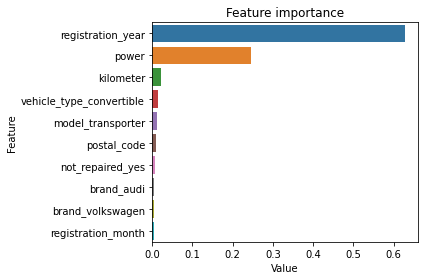

In [30]:
feature_importance = model.feature_importances_
feature_imp = pd.DataFrame(sorted(zip(feature_importance, ohe_features_train)), columns=['Value','Feature'])
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False).iloc[:10])
plt.title('Feature importance')
plt.tight_layout()
plt.show();

### Модель «градиентный бустинг» библиотеки LightGBM

Произведем измерение времени, которое требуется модели для обучения и предсказания:

In [31]:
%%time
model = LGBMRegressor(random_state=12345, max_depth=2, n_estimators=4000, learning_rate=1)
model.fit(cat_features_train, cat_target_train, categorical_feature=cat_columns)

Wall time: 18 s


LGBMRegressor(learning_rate=1, max_depth=2, n_estimators=4000,
              random_state=12345)

In [32]:
%%time
predictions_valid = model.predict(cat_features_valid)
print('RMSE =', mean_squared_error(cat_target_valid, predictions_valid) ** 0.5)

RMSE = 1530.7156023977063
Wall time: 6.82 s


Построим график весов признаков модели:

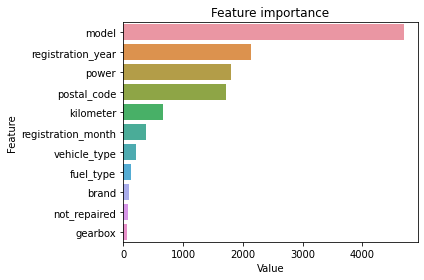

In [33]:
feature_importance = model.feature_importances_
feature_imp = pd.DataFrame(sorted(zip(feature_importance, cat_features_train)), columns=['Value','Feature'])
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False).iloc[:11])
plt.title('Feature importance')
plt.tight_layout()
plt.show();

### Модель «градиентный бустинг» библиотеки CatBoost

Произведем измерение времени, которое требуется модели для обучения и предсказания:

In [34]:
%%time
model = CatBoostRegressor(random_state=12345, loss_function="RMSE", iterations=300, depth=5, learning_rate=1)
model.fit(cat_features_train, cat_target_train, cat_features=cat_columns, verbose=300)

0:	learn: 2510.6448716	total: 188ms	remaining: 56.1s
299:	learn: 1380.9373205	total: 45.5s	remaining: 0us
Wall time: 46.2 s


In [35]:
%%time
predictions_valid = model.predict(cat_features_valid)
print('RMSE =', mean_squared_error(cat_target_valid, predictions_valid) ** 0.5)

RMSE = 1558.8556108969385
Wall time: 134 ms


Построим график весов признаков модели:

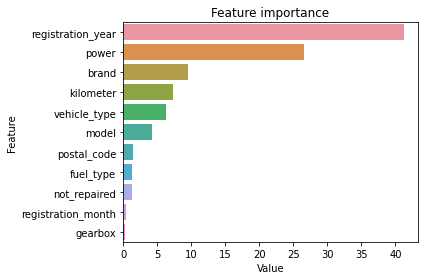

In [36]:
feature_importance = model.feature_importances_
feature_imp = pd.DataFrame(sorted(zip(feature_importance, cat_features_train)), columns=['Value','Feature'])
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False).iloc[:11])
plt.title('Feature importance')
plt.tight_layout()
plt.show();

### Константная модель по медиане

Вычислим значение метрики RMSE для константной модели по медиане:

In [37]:
dr = DummyRegressor(strategy='median')
dr.fit(ohe_features_train, ohe_target_train)
print('RMSE константной модели по медиане =', mean_squared_error(ohe_target_valid, dr.predict(ohe_features_valid)) ** 0.5)

RMSE константной модели по медиане = 4946.171935893076


## Общий вывод

По результатам проекта можно сделать следующие выводы:
1. Лучшей ML-моделью для определения стоимости автомобиля по его производителю, модели, комплектации и характеристикам с учетом ограничения по времени прогнозирования является «градиентный бустинг» библиотеки CatBoost, значение метрики RMSE = 1559, время обучения - около 46 секунд, время прогнозирования - 134 мс.
2. Стоит отметить, что лучшее качество прогнозирования дает модель «градиентный бустинг» библиотеки LightGBM (RMSE = 1531), но время прогнозирования (около 7 секунд) значительно хуже, по сравнению с библиотекой CatBoost.
3. Стоит отметить, что наиболее важными факторами (признаками) для прогноза стоимости автомобиля являются год регистрации, мощность и пробег автомобиля.
4. ML-модели «градиентный бустинг» библиотек LightGBM и CatBoost осуществляют прогноз лучше, чем константная модель (RMSE = 4946). Поэтому, применение указанных ML-моделей является оправданным для бизнеса.